# Lab 2a: Trees

Lab associated with Module 2a: Trees

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [3]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [4]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

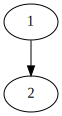

In [5]:
dot

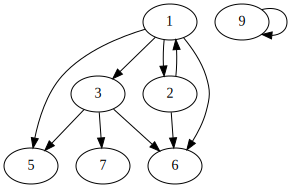

In [6]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')
dot.node('9')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26', '16', '99'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.
## Creating a BST

In [7]:
class Node:
    # Constructor - Initial Node.
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None


def buildBinaryTree(nodes):
    # Inserted function to order the list before the middle node is selected.
    nodes = np.sort(nodes)  
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
    # Call Binary Tree to organise the list into nodes.
    # Finds the middle, sets as root.
    # Recurrsive call there after to populate the tree. 
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
   
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    return root

In [8]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [9]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)

We will make the simpler assumption that all the keys are unique when we are inserting

In [10]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [11]:
test3_tree = buildBinaryTree(test3)
print(test3_tree)

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.
## Visualise Trees 

In [12]:
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

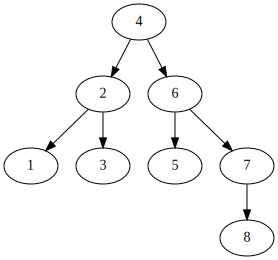

In [13]:
dot = visualize_tree(test1_tree)

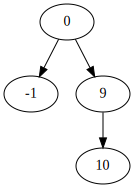

In [14]:
dot = visualize_tree(test2_tree)

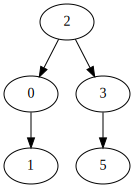

In [15]:
dot = visualize_tree(test3_tree)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

## Search operation should look like:

In [16]:
def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:
        if nodes.left == None:
            return False
        return search(nodes.left, val)

    elif val >= nodes.val:
        if nodes.right == None:
            return False
        return search(nodes.right, val)

In [17]:
search(test3_tree, 3)

True

In [18]:
search(test1_tree, 18)

False

## Insert function now:

In [19]:
def insert(nodes, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None: 
            nodes.left = Node(val)
            return
        else:
            insert(nodes.left, val)
            return

    elif val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = Node(val)
            return
        else:
            insert(nodes.right, val)
            return


        
def insertNode(nodes, node):

    # Empty Tree
    if nodes == None:
        nodes = node
        return

    # Value already exist on the node
    if nodes.val == node.val:
        return

    if node.val < nodes.val:

        if nodes.left == None: 
            nodes.left = node
            return
        else:
            insertNode(nodes.left, node)
            return

    elif node.val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = node
            return
        else:
            insertNode(nodes.right, node)
            return

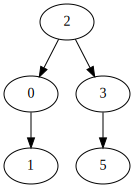

In [20]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

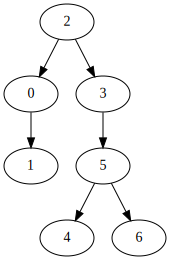

In [21]:
insert(test3_tree, 4)
insert(test3_tree, 6)
dot = visualize_tree(test3_tree)

Let us write delete opertion. We will write another function minValueNode as well.
## Delete Operation

In [22]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes == None:  
        return nodes

    if val < nodes.val:
        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:
        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:
        # Node with only one child or no child
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        nodes.val = temp.val
        nodes.right = delete(nodes.right, temp.val)
        
    return nodes

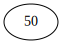

In [23]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

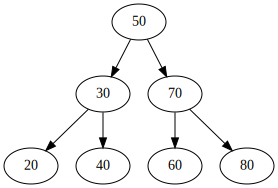

In [24]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)


dot = visualize_tree(test3_tree)

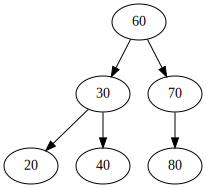

In [25]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)

***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write an algorithm (and code) to check if a binary search tree is balanced. For the purpose of this question, a balanced tree is defined to be a tree such that the heights of the two subtrees of any node never differs by more than one. </font>

In [26]:
### TODO ###
### Good Luck ###

def findHeight(nodes):
    current = nodes
    # Returns zero when the bottom of the tree is reached.
    if current is None:
        return 0
    # Adds one everytime a recursive call is made. 
    return max(findHeight(current.left), findHeight(current.right)) + 1

def balanceCheck(nodes):
    current = nodes

    if current is None:
        return print('No tree to check.')
 
    # Finding the left and right heights
    left = findHeight(current.left)
    right = findHeight(current.right)
    
    # The print statment can be removed, was used for testing.
    print('From node:', nodes.val ,'- Left Height:', left, '| Right Height:', right)
    
    return left - right # Adjusted return value to use with rotation function. 

    # Checking the difference between left and right heights
    #if abs(left - right) <= 1:
    #    return True
    #return False


In [27]:
balance = balanceCheck(test3_tree)
print('Tree Balanced:',balance)

From node: 60 - Left Height: 2 | Right Height: 2
Tree Balanced: 0


In [28]:
#Just and interesting path finder / printer I played with while designing my algorithm.

def findPath(nodes, path, target):
    # To handle empty trees.
    if target == nodes.val:
        return 'Path to', target,'nodes'+path

    if target < nodes.val:
        if nodes.left == None:
            return False
        path = path + '.left'
        return findPath(nodes.left, path, target)

    elif target >= nodes.val:
        if nodes.right == None:
            return False
        path = path + '.right'
        return findPath(nodes.right, path, target)

***

### <font color='red'> Section 5: Write an algorithm (and code) to find the first common ancestor of two nodes in a binary search tree. </font>

In [29]:
#### TODO ####
### Good Luck ###

# Ths function is the same as Search but returns the actual node.
def getNode(nodes, val):
    # Target Found: Return node
    if val == nodes.val:
        return nodes
    
    # Determing Direction: if true go left.
    if val < nodes.val:
        if nodes.left == None:
            return False 
        return getNode(nodes.left, val)
    
    # Determing Direction: if true go right.
    elif val >= nodes.val:
        if nodes.right == None:
            return False
        return getNode(nodes.right, val)


# This is the worker to find the First Common Anscestor.
def FCAHelper(nodes, n1, n2):
    # Checks to see if root value is > n1 & n2. If so go left.
    if nodes.val > max(n1.val, n2.val):
        return FCAHelper(nodes.left, n1, n2)

    # Checks to see if root value is < n1 & n2. If so go right.
    elif nodes.val < min(n1.val, n2.val):
        return FCAHelper(nodes.right, n1, n2)
    
    # If either n1 or n2 are equal with, or either side of 
    # the current nodes value, then the current node is the common anscestor. 
    else:
        print('The first Common Anscestor is:', nodes.val)
        return nodes
    
    
# This functions allows for node values to be entered
# Calls the FCAHelper above to do the heavy lifting. 
def FCA(nodes, n1, n2):
    # To handle empty trees.
    if nodes is None:
        return nodes
    
    # Finding the nodes in the BST
    node1 = getNode(nodes, n1)
    node2 = getNode(nodes, n2)
    
    # Checking to ensure the target nodes exist.
    if (node1 == False or node2 == False):
        return print('ERROR: Both Nodes not Found.')
    else:
        fca = FCAHelper(nodes, node1, node2)
        return fca


In [30]:
#Helpers for my Rotation Function.

def FAHelper(nodes, n1):
    
    if (nodes.val > n1.val and nodes.left.val != n1.val):
        return FAHelper(nodes.left, n1)
    
    elif (nodes.val < n1.val and nodes.right.val != n1.val):
        return FAHelper(nodes.right, n1)
    
    else:
        #print('The parent node is:', nodes.val)
        return nodes

    
def getParent(nodes, n1):
    # To handle empty trees.
    if nodes is None:
        return nodes
    
    # Finding the nodes in the BST
    node1 = getNode(nodes, n1)
    
    # Checking to ensure the target nodes exist.
    if (node1 == False):
        return print('ERROR: Node not Found.')
    else:
        parent = FAHelper(nodes, node1)
        return parent

***

In [31]:
# Test Box

fca = FCA(test3_tree, 40, 20) 
print('FCA:',fca.val)

path = ''
print('\n', findPath(test3_tree, path, 20), '\n')

parent = getParent(test3_tree, 20)

The first Common Anscestor is: 30
FCA: 30

 ('Path to', 20, 'nodes.left.left') 



In [32]:
## TRees for testing rotation 

def heavyLT():
    heaveyLeftTree = buildBinaryTree([50])
    insert(heaveyLeftTree, 50)
    insert(heaveyLeftTree, 30)
    insert(heaveyLeftTree, 20)
    insert(heaveyLeftTree, 40)
    insert(heaveyLeftTree, 70)
    insert(heaveyLeftTree, 60)
    insert(heaveyLeftTree, 80)
    insert(heaveyLeftTree, 5)
    insert(heaveyLeftTree, 25)
    insert(heaveyLeftTree, 10)
    insert(heaveyLeftTree, 15)
    return heaveyLeftTree

def heavyRT():
    heaveyRightTree = buildBinaryTree([50])
    insert(heaveyRightTree, 50)
    insert(heaveyRightTree, 30)
    insert(heaveyRightTree, 20)
    insert(heaveyRightTree, 40)
    insert(heaveyRightTree, 70)
    insert(heaveyRightTree, 60)
    insert(heaveyRightTree, 80)
    insert(heaveyRightTree, 82)
    insert(heaveyRightTree, 90)
    insert(heaveyRightTree, 75)
    insert(heaveyRightTree, 85)
    return heaveyRightTree

### <font color='red'> Section 6: Write an algorithm (and code) to perform a left and right rotation on any specified node of a BST? Your function should take in the tree, as well as a node as input argument, and then return a tree in which rotation is performed. </font>

In [33]:
#### TODO ####
### Good Luck ###

def rotateRight(nodes, x):
    # Z is the parent node, if none returns x. 
    z = getParent(nodes, x.val)
    y = x.left
    x.left = y.right
    y.right = x
    
    # If a parent exists, links the parent to y.
    if (z != x and z.val > y.val):
        z.left = y
        return y
    elif (z != x and z.val < y.val):
        z.right = y
        return y
    else:
        return y


def rotateLeft(nodes, x):
    # Z is the parent node, if none returns x. 
    z = getParent(nodes, x.val)
    y = x.right
    x.right = y.left
    y.left = x
    
    # If a parent exists, links the parent to y.
    if (z != x and z.val > y.val):
        z.left = y
        return y
    elif (z != x and z.val < y.val):
        z.right = y
        return y
    else:
        return y
        

# Takes the tree and the value of the node you whish to rotate.
def balanceNode(nodes, targetValue):
    # To handle empty trees.
    if nodes is None:
        return nodes
    # Finding the actual Node 
    targetNode = getNode(nodes, targetValue)
    
    # If the node is not in the tree return an error.
    if (targetNode == False):
        return print('ERROR: Node does not exist.')
    
    # Returns the balance of the target node.
    # Altered my previous balance function to return an int.
    balance = balanceCheck(targetNode)
    print('Balance is:', balance)

    # if the balance is negative, rotate left.
    if (balance <= -2):
        print('Rotating left on', targetValue, '...')
        return rotateLeft(nodes, targetNode)
        
    # if the balance is positive, rotate right.
    elif (balance >= 2):
        print('Rotating right on', targetValue, '...')
        return rotateRight(nodes, targetNode)
        
    # if the absoloute value of the Balance is < 2
    else:
        print('Node', targetValue, 'is balanced.')


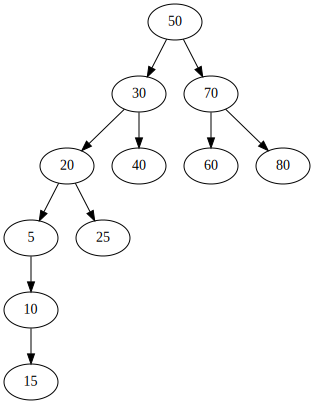

From node: 5 - Left Height: 0 | Right Height: 2
Balance is: -2
Rotating left on 5 ...


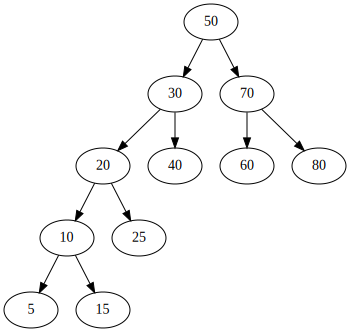

From node: 50 - Left Height: 4 | Right Height: 2
Balance is: 2
Rotating right on 50 ...


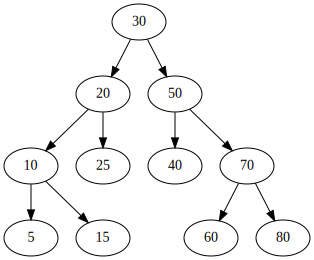

In [34]:
heaveyLeftTree = heavyLT()

dot = visualize_tree(heaveyLeftTree)
balanceNode(heaveyLeftTree, 5)
dot = visualize_tree(heaveyLeftTree)
rotatioOn50 = balanceNode(heaveyLeftTree, 50)
dot = visualize_tree(rotatioOn50)

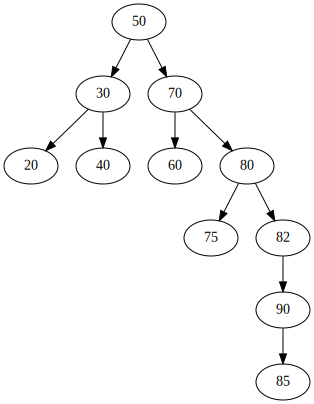

From node: 80 - Left Height: 1 | Right Height: 3
Balance is: -2
Rotating left on 80 ...


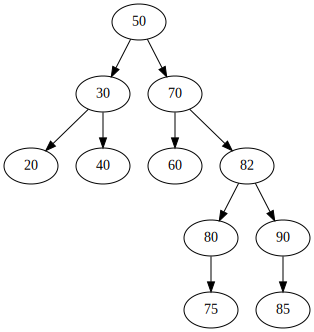

From node: 50 - Left Height: 2 | Right Height: 4
Balance is: -2
Rotating left on 50 ...


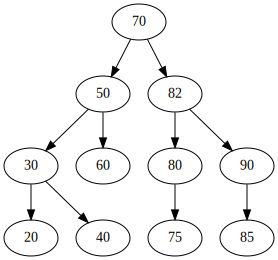

In [35]:
heaveyRightTree = heavyRT()

dot = visualize_tree(heaveyRightTree)
balanceNode(heaveyRightTree, 80)
dot = visualize_tree(heaveyRightTree)
rotatioOn50 = balanceNode(heaveyRightTree, 50)
dot = visualize_tree(rotatioOn50)

***

### Section 6: Insertion in an AVL Tree

In [36]:
class TreeNode(object):

    def __init__(self, val):
        
        self.val = val
        self.left = None
        self.right = None
        self.height = 1

class AVL_Tree(object):
 
    # Recursive function to insert key in subtree 
    # rooted with node and returns new root of subtree.
    def insert(self, root, key):
        
        # STEP 1 - Perform normal BST
        # Recursive call left or right to find insertion location.
        
        if not root: 
            return TreeNode(key)
        # If Key is less than root value: go left. 
        elif key < root.val:
            root.left = self.insert(root.left, key)
        # If Key is greater than root value: go right.
        else:
            root.right = self.insert(root.right, key)
 
        # STEP 2 - Update the height of the ancestor node
        root.height = 1 + max(self.getHeight(root.left),
                           self.getHeight(root.right))
 
        # Step 3 - Get the balance factor
        balance = self.getBalance(root)
 
        # Step 4 - If the node is unbalanced,
        # then try out the 4 cases
        # Case 1 - Left Left (Path from z (grandparent) to y to x)
        # root = z. 
        if balance > 1 and key < root.left.val:
            return self.rightRotate(root)
 
        # Case 2 - Right Right (Path from z to y to x)
        if balance < -1 and key > root.right.val:
            return self.leftRotate(root)
 
        # Case 3 - Left Right (Path from z to y to x)
        if balance > 1 and key > root.left.val:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
 
        # Case 4 - Right Left (Path from z to y to x)
        if balance < -1 and key < root.right.val:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)
 
        return root
 
    def leftRotate(self, z):
        # z = Unbalanced node, parent to y (right Child). 
        y = z.right 
        x = y.left # x is the grandchild of z.
 
        # Perform rotation
        y.left = z
        z.right = x
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                         self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                         self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def rightRotate(self, z):
        # z = Unbalanced node, parent to y (left Child). 
        y = z.left 
        x = y.right # x is the grandchild of z.
 
        # Perform rotation
        y.right = z
        z.left = x
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                        self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                        self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def getHeight(self, root):
        # If node is a leaf node.
        if not root:
            return 0
 
        return root.height
 
    def getBalance(self, root):
        # If node is a leaf node.
        if not root:
            return 0
 
        return self.getHeight(root.left) - self.getHeight(root.right)
 


In [37]:
myTree = AVL_Tree()
root = None
 
root = myTree.insert(root, 10)
root = myTree.insert(root, 20)
root = myTree.insert(root, 30)
root = myTree.insert(root, 40)
root = myTree.insert(root, 50)
root = myTree.insert(root, 25)
root = myTree.insert(root, 60)
root = myTree.insert(root, 70)
root = myTree.insert(root, 80)


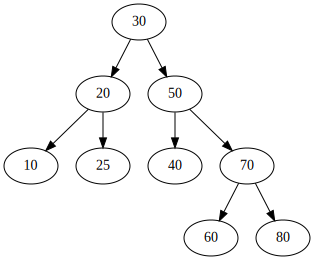

In [38]:
dot = visualize_tree(root)

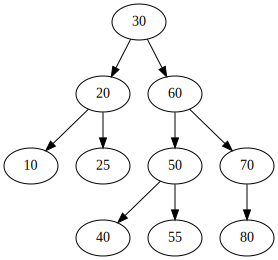

In [39]:
# Test Case 1
root = myTree.insert(root, 55)
dot = visualize_tree(root)
# Inserting 55; we can see that the AVL Tree performed
# a rotate right on 70 then a rotate left on 50

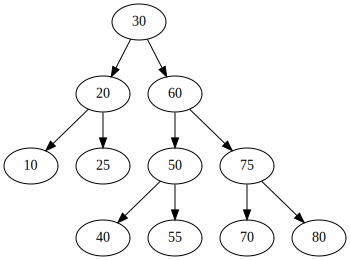

In [40]:
# Test Case 2
root = myTree.insert(root, 75)
dot = visualize_tree(root)
# Inserting 75; we can see that the AVL Tree performed
# a simple rotate left on 70.

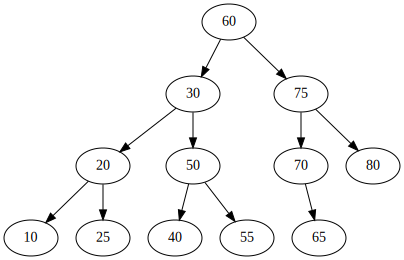

In [41]:
# Test Case 3
root = myTree.insert(root, 65)
dot = visualize_tree(root)
# Inserting 65; we can see that the AVL Tree performed
# a rotate right on 60 then a rotate left on on 50

***